# Data preparation and explore

In [1]:
import pandas as pd
import numpy as np

DATA_DIR = '/Users/admin/edu/NLP/practical_NLP_course/data/'
BLOGS_EN_FILE = 'blog-authorship-corpus.zip'

In [2]:
df = pd.read_csv(DATA_DIR+BLOGS_EN_FILE, compression='zip')

In [3]:
df.shape

(681284, 7)

This file contains few useful columns: gender and age for prediction and text as column to generate features

In [4]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [5]:
df.drop_duplicates(subset="text", inplace=True)

Explore length of the column text for the chars

In [6]:
df.text.str.len().describe()

count    611652.000000
mean       1163.233872
std        2419.298950
min           4.000000
25%         250.000000
50%         676.000000
75%        1459.000000
max      790123.000000
Name: text, dtype: float64

In [7]:
df.text.str.len().plot()

There are several outliers that have to be truncated

In [8]:
df = df.loc[(df.text.str.len() < 18000) & (df.text.str.len() > 7)]

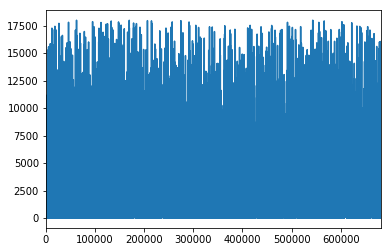

In [9]:
df.text.str.len().plot()

In [10]:
df.age.describe()

count    611021.000000
mean         24.156944
std           7.869953
min          13.000000
25%          17.000000
50%          24.000000
75%          27.000000
max          48.000000
Name: age, dtype: float64

In [11]:
df.age.value_counts()

24    71980
17    70562
23    66658
16    60790
25    59384
26    49969
27    40802
15    38318
14    24006
34    20891
33    16653
35    16041
36    13566
13    11028
37     8981
38     6690
39     5256
40     4672
45     4181
43     4081
41     3633
48     3519
46     2648
42     2626
47     2158
44     1928
Name: age, dtype: int64

In [14]:
df.groupby('topic')['age'].agg(['count','mean','min','max'])

,count,mean,min,max
topic,,,,
Accounting,3669,31.123739,15,47
Advertising,4440,28.537613,13,47
Agriculture,1226,23.508972,14,47
Architecture,1287,26.090132,14,48
Arts,26340,25.691989,13,48
Automotive,1216,28.389803,14,46
Banking,2892,26.306017,13,48
Biotech,1846,23.139762,14,44
BusinessServices,4245,27.991284,14,47


Few topics are out of mean values. Students are the biggest among them. Let's keep it in the corpus, but keep it mind.

In [21]:
df.id.value_counts().describe()

count    18965.000000
mean        32.218350
std         94.946719
min          1.000000
25%          5.000000
50%         10.000000
75%         25.000000
max       4167.000000
Name: id, dtype: float64

Some users have a lot of posts, which can overlap the model for them. Let's limit this users by 200 posts.

In [37]:
df['id_count'] = df.groupby('id').cumcount()

In [38]:
df = df.loc[df.id_count < 200]
df.shape

(489674, 9)

Also let's add few general features to the dataframe

In [ ]:
df["word_count"] = df.text.str.split().str.len()
df["char_length"] = df.text.str.len()

Divide users by age groups based on quantiles. Later, we may review this groups.

In [41]:
df["age_group"] = pd.qcut(df["age"],3,precision=0,)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
df.age_group.value_counts()

(12.0, 17.0]    176153
(17.0, 25.0]    159832
(25.0, 48.0]    153689
Name: age_group, dtype: int64

Also we can divide users by gender

In [44]:
df["age+sex"] = df["age_group"].astype(str)+df["gender"]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
df["age+sex"].value_counts()

(12.0, 17.0]female    88484
(12.0, 17.0]male      87669
(17.0, 25.0]female    84312
(25.0, 48.0]male      79597
(17.0, 25.0]male      75520
(25.0, 48.0]female    74092
Name: age+sex, dtype: int64

If I divide the users by such groups, I get well-balanced groups.

In [48]:
data_preped = df[['text', 'word_count', 'char_length', 'age+sex']]

In [54]:
data_preped

,text,word_count,char_length,age+sex
0,"Info has been found (+/- 100 pages,...",28,157,"(12.0, 17.0]male"
1,These are the team members: Drewe...,20,181,"(12.0, 17.0]male"
3,testing!!! testing!!!,2,43,"(12.0, 17.0]male"
4,Thanks to Yahoo!'s Toolbar I can ...,65,402,"(25.0, 48.0]male"
5,I had an interesting conversation...,662,3695,"(25.0, 48.0]male"
6,Somehow Coca-Cola has a way of su...,196,1105,"(25.0, 48.0]male"
7,"If anything, Korea is a country o...",387,2281,"(25.0, 48.0]male"
8,Take a read of this news article ...,386,2289,"(25.0, 48.0]male"
9,I surf the English news sites a l...,160,957,"(25.0, 48.0]male"
10,"Ah, the Korean language...it look...",296,1767,"(25.0, 48.0]male"


In [57]:
data_preped.to_csv(DATA_DIR+'blog_authors_preped.csv.gzip', index=False, compression="gzip")

Now, we can split df to train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['total_comment'],
                                                    data['label'],
                                                    test_size=0.2,
                                                    random_state=100)